# Libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import import_ipynb
from EDAClass import Eda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calmap
import math

## File: customerDemographic

In [2]:
customerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', header=1)

In [3]:
customerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
df = customerDemographic.groupby(customerDemographic['DOB']).count().iloc[:,0]
df

DOB
1843-12-21    1
1931-10-23    1
1935-08-22    1
1940-09-22    1
1943-08-11    1
             ..
2002-01-06    1
2002-01-09    1
2002-01-15    1
2002-01-26    1
2002-03-11    1
Name: customer_id, Length: 3448, dtype: int64

In [45]:
customerDemographic[customerDemographic['DOB'] == '1843-12-21']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


### Missing Values

In [7]:
customerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [8]:
customerDemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

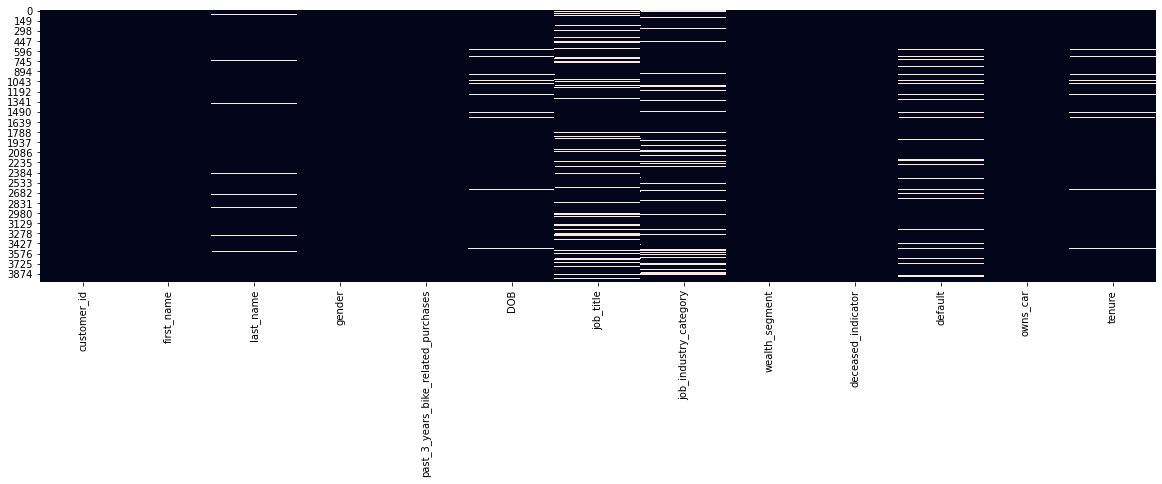

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(customerDemographic.isnull(), cbar=False)
plt.show()

### Duplicated Rows

In [10]:
#newCustomerList[newCustomerList.duplicated(keep=False)]
customerDemographic[customerDemographic.duplicated() == True]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


### Unique Values

In [11]:
for i in customerDemographic.columns:
    print('Unique {}:'.format(i), customerDemographic[i].unique().shape)

Unique customer_id: (4000,)
Unique first_name: (3139,)
Unique last_name: (3726,)
Unique gender: (6,)
Unique past_3_years_bike_related_purchases: (100,)
Unique DOB: (3449,)
Unique job_title: (196,)
Unique job_industry_category: (10,)
Unique wealth_segment: (3,)
Unique deceased_indicator: (2,)
Unique default: (91,)
Unique owns_car: (2,)
Unique tenure: (23,)


In [12]:
cols= ['gender', 'past_3_years_bike_related_purchases', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 
       'owns_car', 'tenure']
for i in cols:
    print('Unique {}:\n'.format(i), customerDemographic[i].unique())
    print('')

Unique gender:
 ['F' 'Male' 'Female' 'U' 'Femal' 'M']

Unique past_3_years_bike_related_purchases:
 [93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52]

Unique job_title:
 ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Con

### Description

In [13]:
customerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [14]:
customerDemographic.describe(include=['O'])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Tobe,Ramsdell,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


### Histograms

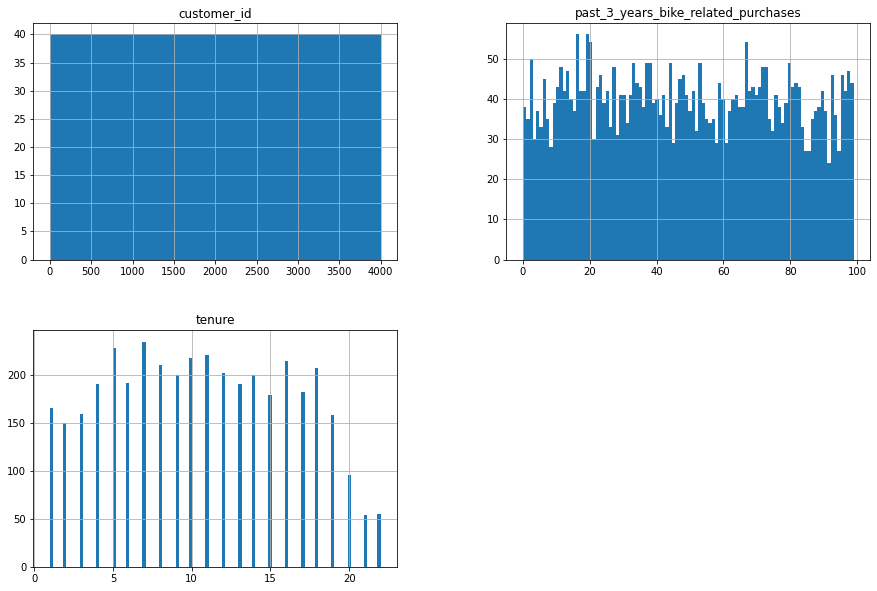

In [15]:
customerDemographic.hist(figsize=(15,10), bins=100)
plt.show()

### Bar chart for categorical variables

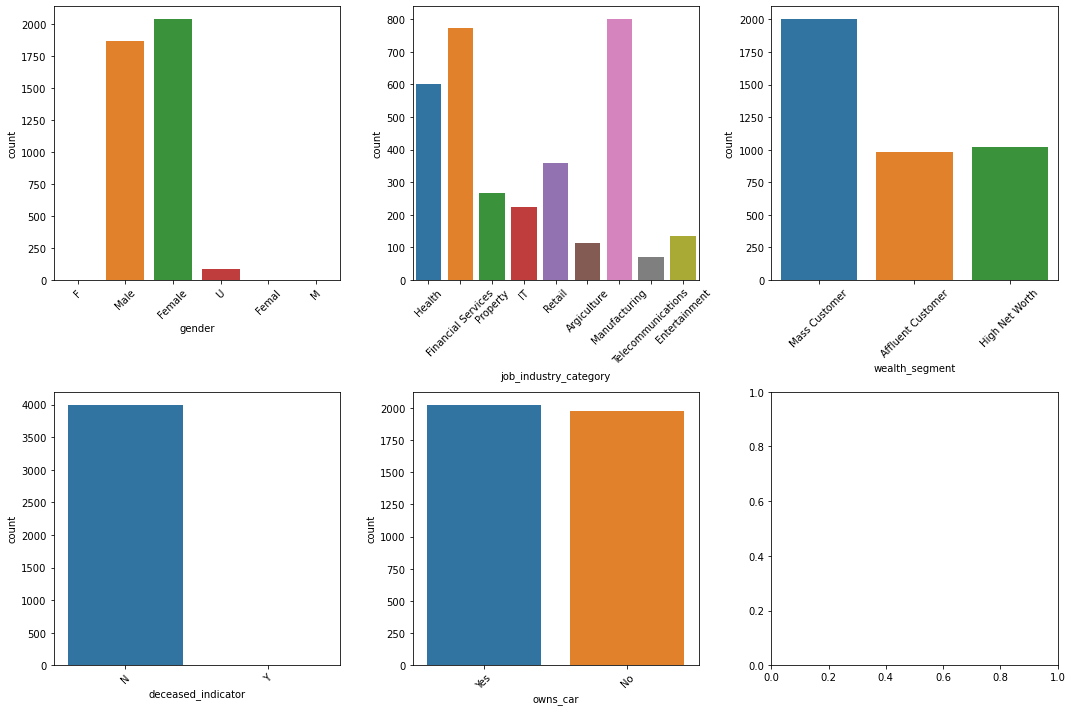

In [37]:
df_cat = customerDemographic.select_dtypes(include='object')
df_cat = df_cat[['gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']]
fig, axes = plt.subplots(math.ceil((len(df_cat.columns)-1)/3),3, figsize=(15,10))
for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=45)
        sns.countplot(data = df_cat, x = df_cat.columns[i], ax=ax)
plt.tight_layout()
plt.show()

### Trend Chart

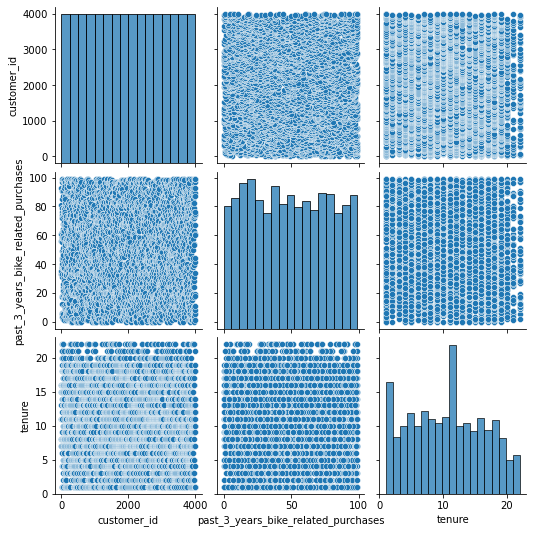

In [38]:
sns.pairplot(customerDemographic)

### Pandas Report

In [39]:
ProfileReport(customerDemographic)